<a href="https://colab.research.google.com/github/Chdunham/SUREResearch2021/blob/main/Summer2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Get Adult data from UCI repository: https://archive.ics.uci.edu/ml/datasets/adult
# >50K, <=50K.
# age: continuous.
#workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
# fnlwgt: continuous.
# education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
# education-num: continuous.
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
# occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
# sex: Female, Male.
# capital-gain: continuous.
# capital-loss: continuous.
# hours-per-week: continuous.
# native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
tf.__version__

# Source: https://fairmlbook.org/code/adult.html

features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] 

# Change these to local file if available
train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# This will download 3.8M
original_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', 
                             engine='python', na_values="?")
# This will download 1.9M
original_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', 
                            engine='python', na_values="?", skiprows=1)
original_test

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
num_train = len(original_train)
original = pd.concat([original_train, original_test])
roc_original = original
labels = original['Target']
print(labels.head)
labels = labels.replace('<=50K', 0).replace('>50K', 1)
labels = labels.replace('<=50K.', 0).replace('>50K.', 1)
labels.head()

<bound method NDFrame.head of 0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
16276    <=50K.
16277    <=50K.
16278    <=50K.
16279    <=50K.
16280     >50K.
Name: Target, Length: 48842, dtype: object>


0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

In [4]:
num_train = len(original_train)
original = pd.concat([original_train, original_test])
original = original.dropna()
# Drop rows with missing values.
labels = original['Target']

labels = labels.replace('<=50K', 0).replace('>50K', 1)
labels = labels.replace('<=50K.', 0).replace('>50K.', 1)
# Make categorical columns numeric (one-hot encoding).
# Normalize.
X = pd.get_dummies(original.drop(['fnlwgt', 'Target'], axis = 1))
y = labels
y

0        0
1        0
2        0
3        0
4        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    1
Name: Target, Length: 45222, dtype: int64

In [5]:
# Get separate training and test sets.
import numpy as np
from sklearn.model_selection import train_test_split

# get train and test data from our set and outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)

# Normalize data to read easier for ML
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [6]:
from tensorflow import keras
# Look @ overfitting
# How do we run machine learning experiments? What are best practices, loss curves
# train/test sets, validation sets
# Look at in graphs
model = Sequential()

model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(75, activation='relu'))

model.add(Dense(50, activation='relu'))

#model.add(Dense(25, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

epoch = 20

batch = 265

# Learning rate in model.compile? 1e - 2, 1.5e - 3
tf.keras.optimizers.Adam(
    learning_rate=0.01, epsilon=1e-07, amsgrad=False,
    name='adam'
)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch, verbose=1, validation_split=0.1)

model.test_on_batch(X_test, y_test)
model.metrics_names


Epoch 1/20
100/100 [==============================] - 12s 8ms/step - loss: 0.4840 - accuracy: 0.7507 - val_loss: 0.3455 - val_accuracy: 0.8367
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3386 - accuracy: 0.8382 - val_loss: 0.3336 - val_accuracy: 0.8432
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3213 - accuracy: 0.8461 - val_loss: 0.3298 - val_accuracy: 0.8452
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8510 - val_loss: 0.3348 - val_accuracy: 0.8429
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8564 - val_loss: 0.3303 - val_accuracy: 0.8490
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3030 - accuracy: 0.8541 - val_loss: 0.3300 - val_accuracy: 0.8425
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.3016 - accuracy: 0.8581 - val_loss: 0.3277 - val_accuracy: 0.8446
Epoch

['loss', 'accuracy']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


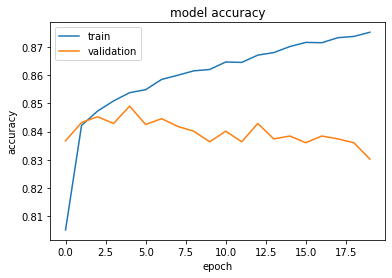

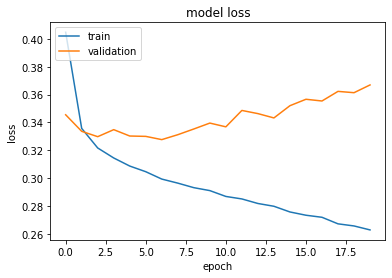

In [7]:

import matplotlib.pyplot as plt
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [8]:
#achitecture, validation, look @ accuracies
# https://www.tensorflow.org/io/tutorials/bigquery
# https://keras.io/examples/structured_data/deep_neural_decision_forests/

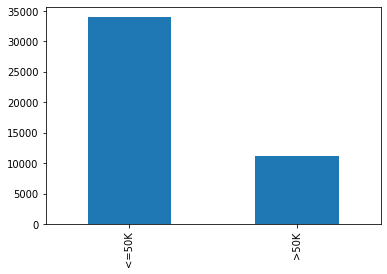

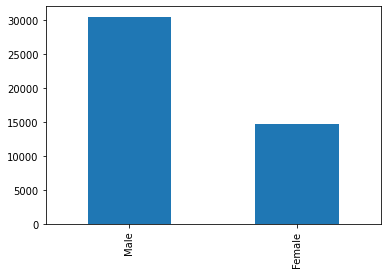

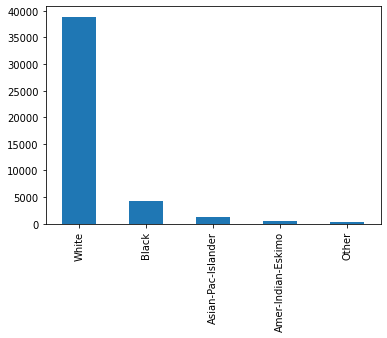

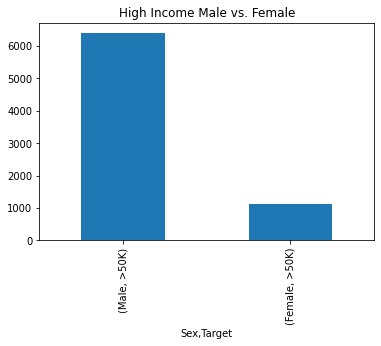

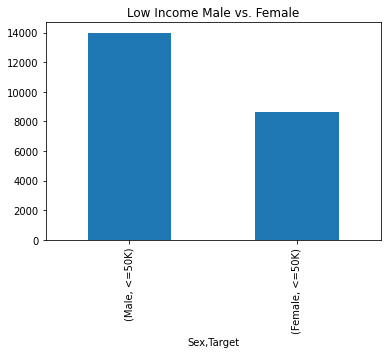

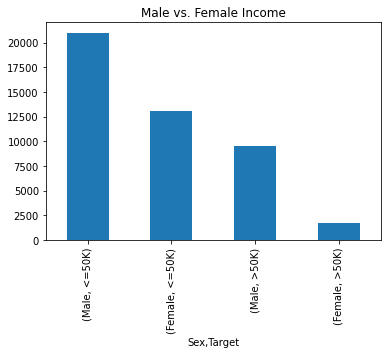

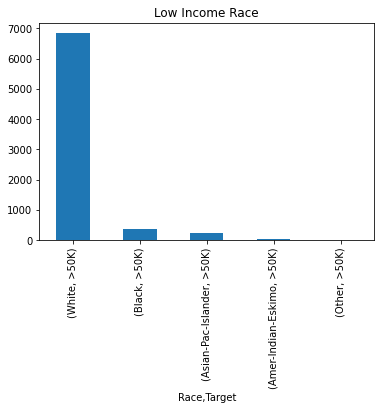

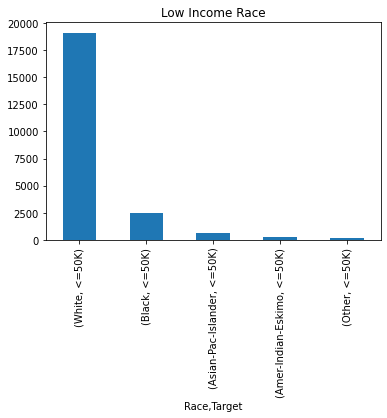

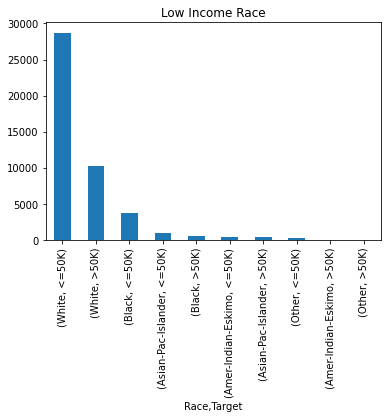

In [59]:
# Exploratory data analysis (EDA): Show counts and bar graphs of
#       High income vs low income
High_income = original['Target']
High_income = High_income.replace('<=50K', '<=50K').replace('>50K', '>50K')
High_income = High_income.replace('<=50K.', '<=50K').replace('>50K.', '>50K')
High_income.value_counts().plot(kind='bar');
plt.show()
#       Male vs female
gender = original['Sex']
gender.value_counts().plot(kind='bar');
plt.show()
#       Black vs white
Race = original['Race']
Race.value_counts().plot(kind='bar');
plt.show()
#       High income male vs female
HIM = original[['Sex', 'Target']]
HIM = HIM[HIM['Target'] == '>50K']
HIM.value_counts().plot(kind='bar')
plt.title('High Income Male vs. Female')
plt.show()
#       Low income male vs female
LIM = original[['Sex', 'Target']]
LIM = LIM[LIM['Target'] == '<=50K']
LIM.value_counts().plot(kind='bar')
plt.title('Low Income Male vs. Female')
plt.show()

#       Both High and low
BothIncome = original[['Sex', 'Target']]
BothIncome = BothIncome.replace('<=50K', '<=50K').replace('>50K', '>50K')
BothIncome = BothIncome.replace('<=50K.', '<=50K').replace('>50K.', '>50K')
BothIncome.value_counts().plot(kind='bar')
plt.title('Male vs. Female Income')
plt.show()
#       High income black vs white
HIR = original[['Race', 'Target']]
HIR = HIR[HIR['Target'] == '>50K']
HIR.value_counts().plot(kind='bar')
plt.title('Low Income Race')
plt.show()
#       Low income black vs white
LIR = original[['Race', 'Target']]
LIR = LIR[LIR['Target'] == '<=50K']
LIR.value_counts().plot(kind='bar')
plt.title('Low Income Race')
plt.show()

#       Income for All Races Combined
allRace = original[['Race', 'Target']]
allRace = allRace.replace('<=50K', '<=50K').replace('>50K', '>50K')
allRace = allRace.replace('<=50K.', '<=50K').replace('>50K.', '>50K')
allRace.value_counts().plot(kind='bar')
plt.title('Low Income Race')
plt.show()